<a href="https://colab.research.google.com/github/WLAraujo/Projetos-Dirigidos---IEEE-CS/blob/main/Projeto_Dirigido_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Esse caderno foi parcialmente inspirado nos códigos disponibilizados em https://www.kaggle.com/stoicamihai/visualization-with-python.

Aqui usaremos duas bases de dados.

Nesse projeto vamos trabalhar com mais visualizações usando matplotlib e seaborn e também vamos começar a usar a plotly.

# Um pouco sobre as bases de dados

A primeira é uma base de dados clássica, inclusive existe uma página da wikipedia que fala exclusivamente sobre ela (https://en.wikipedia.org/wiki/Iris_flower_data_set). De maneira breve, ela possui dados de 150 flores que podem ser de 3 espécies (setosa, versicolor, virginica). Para trabalhar em cima dessa base vamos usar o matplotlib e a seaborn. Os atributos dessa base de dados são:

*   ID - Usado na identificação de cada amostra
*   SepalLengthCm - Indica o comprimento da sépala da flor
*   SepalWidthCm - Indica a largura da sépala da flor
*   PetalLengthCm - Indica o comprimento da pétala da flor
*   PetalWidthCm - Indica a largura da pétala da flor
*   Species - Espécie da observação da amostra

Já a segunda base de dados usada será extraida dos datasets exemplos disponibilizados por um pacote da Plotly e tras diversos dados de PIB de países ao longo do tempo. Para analisar essa biblioteca vamos usar a Plotly. São ao todo 1700 linhas que são registros do pib de um país em um determinado ano. São 8 colunas, sendo que as colunas são:
* country - Nome do país do registro
* continent - Continente do país do registro
* year - Ano do registro
* lifeExp - Expectativa de vida do país naquele ano
* pop - População do país naquele ano
* gdpPercap - PIB per capta do país naquele ano
* iso_alpha - Código iso do nome do país
* iso_num - Código iso do número do país


# Importações de bibliotecas e da base de dados

In [ ]:
# instalando o plotly
!pip install --upgrade plotly

     |████████████████████████████████| 13.2MB 22.5MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
# importando bibliotecas
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
import plotly.express as px
import plotly.data as dt
import plotly.graph_objects as go
import plotly.data as dt

In [ ]:
# json token da API do Kaggle
from google.colab import files
files.upload()

In [ ]:
# criando pasta kaggle para salvar o json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# baixando dataset específico
!kaggle datasets download -d uciml/iris

  0% 0.00/3.60k [00:00<?, ?B/s]
100% 3.60k/3.60k [00:00<00:00, 6.75MB/s]


In [ ]:
# o arquivo foi baixado como .zip, vamos descompactar
import zipfile
zip_ref = zipfile.ZipFile('iris.zip', 'r')
zip_ref.extractall('iris')
zip_ref.close()

In [ ]:
# tranformando no formato de dataframe
iris=pd.read_csv('/content/iris/Iris.csv')

# Matplotlib e Seaborn

In [ ]:
# visualizando primeiras linhas
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# contabilizando quantas linhas de cada espécie temos
iris["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

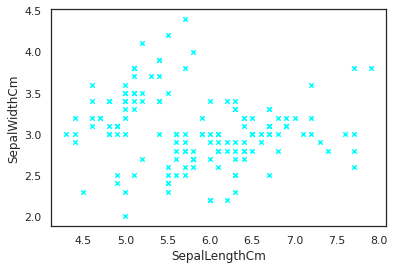

In [ ]:
# fazendo um scatterplot entre atributos SepalLengthCm e SepalWidthCm
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm", color="cyan", marker="x")

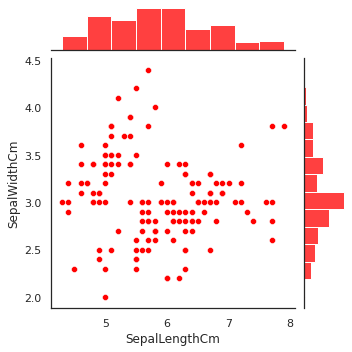

In [ ]:
# vamos usar a seaborn para unificar as demonstrações de scatterplot e histogramas
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=5, color="red", marker="o")

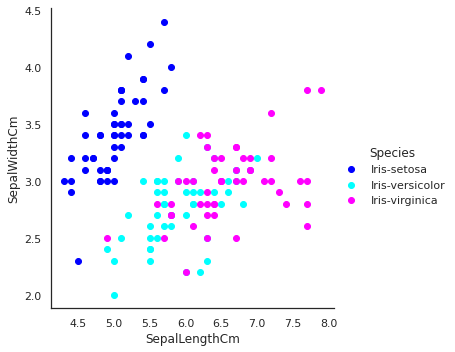

In [ ]:
# vamos fazer um scatterplot que nos permita visualizar qual é espécie de cada exemplar
sns.FacetGrid(iris, hue="Species", size=5, palette=["blue", "cyan", "magenta"]).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()

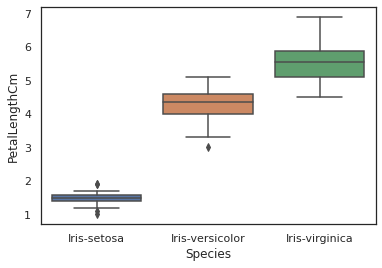

In [ ]:
# vamos fazer uma visualização de boxplot agora, separando por espécie e usando o atributo PetalLengthCm
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)

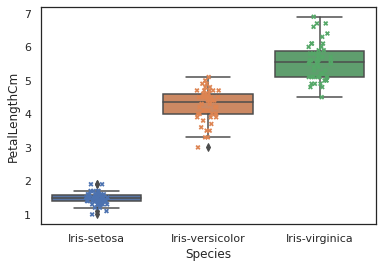

In [ ]:
# vamos agora adicionar a visualização da distribuição dos pontos sobre os boxplots do último gráfico
# isso os permite visualizar a distribuição de pontos ao longo do atributo PetalLenghtCm
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, marker="X")

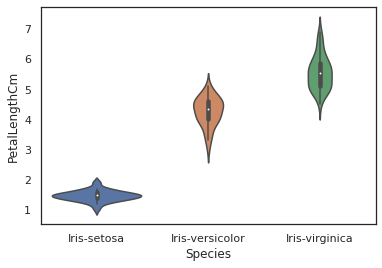

In [ ]:
# vamos agora fazer uma visualização através de um violin plot
# esse tipo de gráfico é praticamente o boxplot mas também mostra a distribuição da densidade de probabilidade
sns.violinplot(x="Species", y="PetalLengthCm", data=iris, size=5)

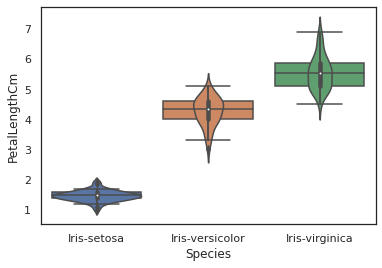

In [ ]:
# só por comparação vamos plotar o violin plot sobre o boxplot
# veja que ambos os gráficos praticamente se sobrepõem
sns.violinplot(x="Species", y="PetalLengthCm", data=iris, size=5)
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)

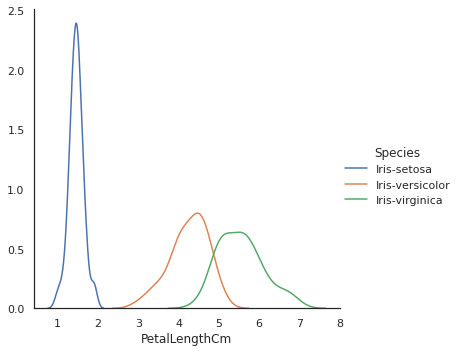

In [ ]:
# vamos agora ver como a função de densidade de probabilidade se comporta para cada espécie
sns.FacetGrid(iris, hue="Species", size=5).map(sns.kdeplot, "PetalLengthCm").add_legend()

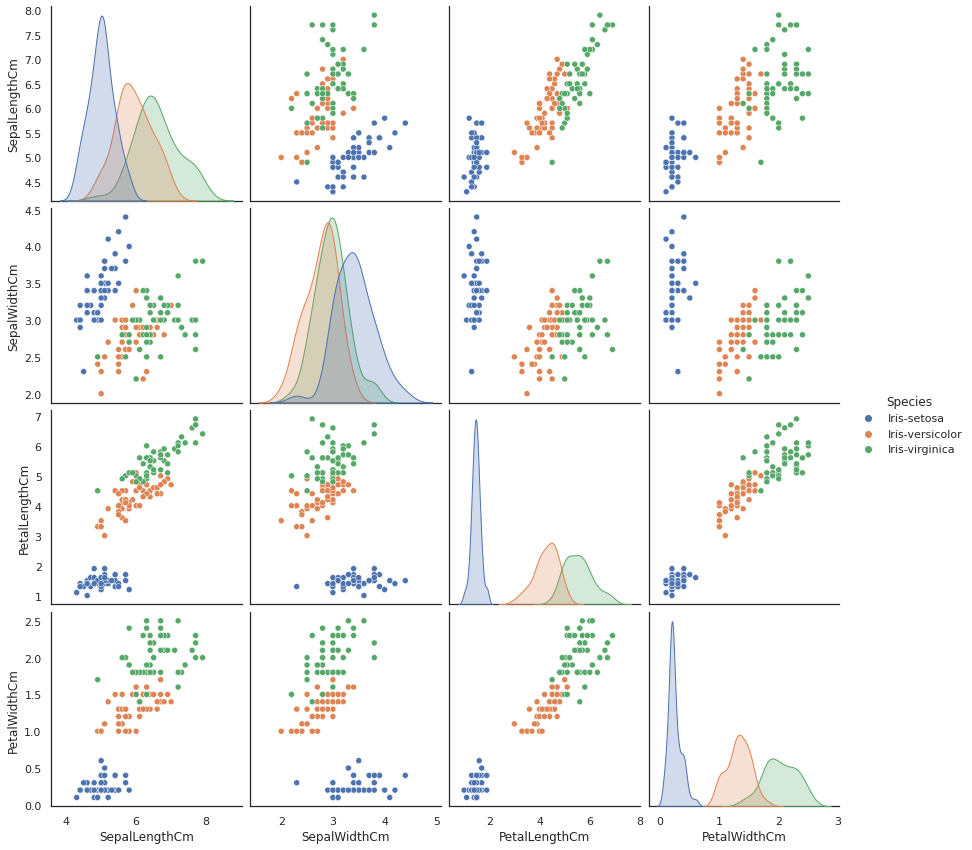

In [ ]:
# agora, vamos ver todos os scatterplots entre cada par de atributos do dataset
# perceba que antes dropamos a coluna "id" porque sua única função é a identificação
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3)

# Plotly

Lembrando que:

* **plotly.express** - interface de alto nível para visualização de dados.

* **plotly.graphic_object** - mesma coisa que a plotly.express, porém, apresenta-se em baixo nível, isso significa que podemos ser mais específicos e detalhistas no que vamos pedir da visualização.

In [ ]:
# Vamos importar os dados da própria biblioteca do plotly que disponibiliza exemplos
df_1 = dt.gapminder()
df_1

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [ ]:
# Vamos criar dois novos datasets um com os dados do Brasil e outro com dados de 3 países: Brasil, México e Argentina
df_2 = df_1.loc[(df_1['country']=='Brazil')]
df_3 = df_1.loc[(df_1['country']=='Brazil') | (df_1['country']=='Mexico') | (df_1['country']=='Argentina')]

In [ ]:
# Vamos começar com um gráfico (ano x gdpPercapta) do Brasil usando df_2
px.line(df_2, x = 'year', y = 'gdpPercap', labels={'x':'year', 'y':'gdpPercap'})

In [ ]:
# 6- Agora, vamos ver um gráfico com 3 linhas, uma para cada um dos três países de df_3. O parâmetro colors indica qual o atributo usado na divisão de cores
px.line(df_3, x = 'year', y = 'gdpPercap', labels={'x':'year', 'y':'gdpPercap'}, color='country')

In [ ]:
# Vamos usar um objeto go.Figure() para plottar um scatterplot comparando a (população x ano) de 3 países: EUA, Canada e Mexico
graf = go.Figure()
# A função add_trace adiciona um novo 
graf.add_trace(go.Scatter(x = df_1.year, y = df_1.loc[df_1['country']=='United States']['pop'], mode = 'lines+markers', name='EUA'))
graf.add_trace(go.Scatter(x = df_1.year, y = df_1.loc[df_1['country']=='Canada']['pop'], mode = 'lines+markers', name='CAN'))
graf.add_trace(go.Scatter(x = df_1.year, y = df_1.loc[df_1['country']=='Mexico']['pop'], mode = 'lines+markers', name='MEX'))

In [ ]:
# Vamos adicionar uma nova linha no gráfico acima, uma linha com o Japão, mas vamos customizar a linha através do argumento line
graf.add_trace(go.Scatter(x = df_1.year, y = df_1.loc[df_1['country']=='Japan']['pop'], mode='lines+markers', name='MEX', 
                          line=dict(color= 'dimgrey', width = 10, dash='dashdot')))
# Obs. O nome das cores é o mesmo que o usado em css (linguagem), só pesquisar no google

In [ ]:
# Vamos remover a linha do Japão do nosso gráfico, primeiro, é preciso entender que objetos go.Figure() salvam seus dados em um dicionário, por isso a deleção é feita da seguinte forma
# para ser honesto, a deleção aparenta mais como uma atualização
graf.data = [graf.data[0], graf.data[1], graf.data[2]]
# Com o código acima escolhemos quais traces queremos que continuem no gráfico

In [ ]:
# Vamos atualizar o objeto graf com um título e mudar o nome dos eixos
graf.update_layout(title = 'População na América do Norte', xaxis_title = 'Ano', yaxis_title = 'População')

In [ ]:
# Vamos atualizar o objeto graf personalizando os eixos, brinquem um pouco com os parâmetros para saber o que cada um faz
# veja que aqui usamos a função update_layout
graf.update_layout(xaxis = dict(showgrid = False, showticklabels = True, linecolor='DarkRed', linewidth=2, 
                   ticks = 'outside', tickfont = dict(family = 'Arial', size = 12, color = 'DimGrey')), 
                   yaxis = dict(showgrid = False, zeroline = False, showticklabels = False), autosize = False,
                   margin = dict(autoexpand = True), showlegend = False, plot_bgcolor = 'SlateGrey')

In [ ]:
# Aqui vamos fazer o procedimento simples de atualizar a cor de uma linha do grafo, veja que tudo aqui é baseado em dicionários
# o parâmetro selector específica qual é a linha que queremos fazer alterações
# veja que aqui usamos a função update_traces
graf.update_traces(marker = dict(color = 'Olive'), selector = dict(name = 'EUA'))

In [ ]:
# Vamos agora usar outro dataframe, aqui vamos considerar os dados de Brasil e Alemanha
df_4 = px.data.gapminder().loc[(df_1['country']=='Germany') | (df_1['country']=='Brazil') | (df_1['country']=='United Kingdom')]

In [ ]:
# Vamos começar plotando a expectativa de vida da alemanha conforme os anos usando um gráfico de barras
px.bar(df_4.loc[df_4['country']=='Germany'], x = 'year', y = 'lifeExp', labels={'year':'Ano', 'lifeExp':'Expectativa de Vida'})

In [ ]:
# Agora, vamos comparar as expectativas de vida ao longo dos censos entre Brasil e Alemanha
px.bar(df_4.loc[(df_4['country']=='Germany')|(df_4['country']=='Brazil')], 
       x = 'year', y = 'lifeExp', labels={'year':'Ano', 'lifeExp':'Expectativa de Vida'}, 
       color = 'country', barmode = 'group')

In [ ]:
# Ao inves de fazermos uma comparação lado a lado poderiamos simplesmente visualizar um montante e as contribuições de cada país, para isso
# basta retirar o barmode
px.bar(df_4.loc[(df_4['country']=='Germany')|(df_4['country']=='Brazil')], x = 'year', 
       y = 'pop', labels={'year':'Ano', 'pop':'População'}, 
       color = 'country')

In [ ]:
# Vamos realizar um outro tipo de busca de linhas nos dataframes através da função .query()
# Vamos criar um novo dataframe para mostrar a expectativa de vida nos 7 países mais populosos das Americas, segundo os valores de 2007
df_5 = df_1.query("continent == 'Americas' and year == 2007")
df_5 = df_5.nlargest(7, columns=['pop'])
fig = px.bar(df_5, x = 'country', y = 'lifeExp', labels={'country':'Ano', 'lifeExp':'Expectativa'}, text = 'lifeExp', color = 'country')
fig

In [ ]:
# Vamos fazer algumas mudanças nesse gráfico
fig.update_traces(textposition='outside') #Colocando os valores que estão dentro das barras para fora
fig.update_xaxes(tickangle=45) #Alterando o ângulo dos valores do eixo x